# Dash: Personal Agent with GraphRAG & NVIDIA cuGraph

In today's digital world, we're drowning in information across dozens of platforms while juggling countless tasks. What if everyone had their own personal AI agent - not just another chatbot, but a truly personalized assistant that remembers everything about you, learns your preferences, and takes meaningful actions on your behalf? Dash was born from this vision of AI that works for you, understands you, and evolves with you - creating a future where personal agents transform how we interact with technology and manage our digital lives.


## Setup Project Repository
This cell clones the Dash repository and installs the required dependencies.


In [ ]:
!git clone https://github.com/NavpreetDevpuri/dash.git

Cloning into 'dash'...
remote: Enumerating objects: 816, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 816 (delta 72), reused 63 (delta 38), pack-reused 706 (from 1)
Receiving objects: 100% (816/816), 8.53 MiB | 7.04 MiB/s, done.
Resolving deltas: 100% (484/484), done.


In [ ]:
!pip install -r dash/backend/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.0/426.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 k

## Configure Database Connection
Here we set up connection parameters for ArangoDB, which serves as our graph database. We have two databases:
- `user_1270834`: A example private database for user-specific data
- `common_db`: A public database for shared information like restaurant data

In [ ]:
!cd dash; git pull

Already up to date.


In [ ]:
import os, sys
from arango import ArangoClient

private_db_name="user_1270834"
host="https://afc3138ddacc.arangodb.cloud:8529"
username="root"
password="Jav9ZvTdowF3q66xXEiv"
public_db_name = "common_db"
client = ArangoClient(hosts=host)

sys.path.append("dash/backend")

## Migrations
This section includes database schema setup and data import utilities:
- **Schema Creators**: `EmailGraphSchema`, `SlackGraphSchema`, `WhatsAppGraphSchema` establish the database structure for different communication channels
- **Data Importers**:
  - `ContactsImporter`: Loads user contacts into the private database
  - `EmailDataImporter`: Populates email data
  - `SlackMessagesImporter`: Imports Slack conversation history
  - `ImportMeData`: Adds personal user information
  - `RestaurantGraphImporter`: Populates the public database with restaurant information

  These migrations first check if databases exist (creating them if needed), then set up schemas and import sample data to provide a realistic environment for the agents.

In [ ]:
# # Import all importers
# from migrations.email_graph_schema import EmailGraphSchema
# from migrations.import_contacts import ContactsImporter
# from migrations.import_email_data import EmailDataImporter
# from migrations.import_slack_messages import SlackMessagesImporter
# from migrations.restaurant_graph_importer import RestaurantGraphImporter
# from migrations.slack_graph_schema import SlackGraphSchema
# from migrations.whatsapp_graph_schema import WhatsAppGraphSchema
# from migrations.import_me_data import ImportMeData

# sys_db = client.db('_system', username=username, password=password)
# if not sys_db.has_database(private_db_name):
#   sys_db.create_database(name=private_db_name)
# if not sys_db.has_database(public_db_name):
#   sys_db.create_database(name=public_db_name)

# SlackGraphSchema().run(db_name=private_db_name, host=host, username=username, password=password)
# WhatsAppGraphSchema().run(db_name=private_db_name, host=host, username=username, password=password)
# EmailGraphSchema().run(db_name=private_db_name, host=host, username=username, password=password)
# SlackMessagesImporter(db_name=private_db_name, host=host, username=username, password=password).run()
# EmailDataImporter(db_name=private_db_name, host=host, username=username, password=password).run()
# ContactsImporter(db_name=private_db_name, host=host, username=username, password=password).run()
# ImportMeData(db_name=private_db_name, host=host, username=username, password=password).run()
# RestaurantGraphImporter(db_name=public_db_name, host=host, username=username, password=password).run()

The exact code showed the error `AttributeError: 'Config' object has no attribute 'arangodb'`, which is why I implemented a custom ArangoDB to NetworkX importer: `load_arangodb_graph_to_networkx.py`.

In [ ]:
import networkx as nx
import nx_arangodb as nxadb

db = client.db(public_db_name, username=username, password=password)

G_adb = nxadb.Graph(name="restaurants", db=db)

print(G_adb)

[06:43:55 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.
[06:43:55 +0000] [INFO]: Graph 'restaurants' exists.
INFO:nx_arangodb:Graph 'restaurants' exists.
[06:43:56 +0000] [INFO]: Default node type set to 'categories'
INFO:nx_arangodb:Default node type set to 'categories'


Graph named 'restaurants' with 59991 nodes and 313302 edges


In [ ]:
%env OPENAI_API_KEY=sk-proj-44fGX....
%env ANTHROPIC_API_KEY=sk-ant-ap....

env: OPENAI_API_KEY=sk-proj-44fGX....
env: ANTHROPIC_API_KEY=sk-ant-ap....


## Initialize Agent Components
This code:
1. Sets up database connections for both private and public data
2. Creates a memory saver for maintaining conversation state
3. Initializes two agents - one using Claude 3.7 Sonnet and another using GPT-4o
4. Each agent has access to private user data and shared public data

In [ ]:
import sys
from arango import ArangoClient
from rich.console import Console
from rich.markdown import Markdown
console = Console()

sys.path.append("dash/backend")

private_db_name="user_1270834"
host="https://afc3138ddacc.arangodb.cloud:8529"
username="root"
password="Jav9ZvTdowF3q66xXEiv"
public_db_name = "common_db"

client = ArangoClient(hosts=host)

import uuid
from langchain_community.graphs import ArangoGraph
from langgraph.checkpoint.memory import MemorySaver

from app.common.llm_manager import LLMManager
from app.agents.main import MainAgent

# Create database connections
client = ArangoClient(hosts=host)
private_db = ArangoGraph(client.db(private_db_name, username=username, password=password, verify=True))
public_db = ArangoGraph(client.db(public_db_name, username=username, password=password, verify=True))

memory = MemorySaver()
# Create and run the WhatsApp agent
agent_claude = MainAgent(
    model=LLMManager.get_anthropic_model(model_name="claude-3-7-sonnet-20250219"),
    private_db=private_db,
    public_db=public_db,
    checkpointer=memory,
    confirmation_callback=lambda x: console.print(f"\nAgent Asked for confirmation: \n{Markdown(x)}")
)
agent_openai = MainAgent(
    model=LLMManager.get_openai_model(model_name="gpt-4o"),
    private_db=private_db,
    public_db=public_db,
    checkpointer=memory,
    confirmation_callback=lambda x: console.print(f"\nAgent Asked for confirmation: \n{Markdown(x)}")
)

Loading edges: 100%|██████████| 313302/313302 [00:30<00:00, 10283.04edge/s]


## Run Interactive Agent Sessions
The final cells start interactive chat sessions with both AI agents, allowing for conversation with debugging enabled.

In [ ]:
agent_openai.run_interactive(thread_id=str(uuid.uuid4()), debug=True)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                          AI Assistant Interactive Mode                                          ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Type your messages below. Press Ctrl+C to exit.

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────


You: email hr for leave on next upcoming monday


Processing...

================================ Human Message =================================

email hr for leave on next upcoming monday
================================== Ai Message ==================================
Tool Calls:
  get_current_datetime (call_4boSNuW1dU1puX38Mlg3TXdI)
 Call ID: call_4boSNuW1dU1puX38Mlg3TXdI
  Args:
================================= Tool Message =================================
Name: get_current_datetime

Current date and time: 2025-03-11 06:50:07
================================== Ai Message ==================================
Tool Calls:
  private_db_query (call_bQCdXsOCEATTjQfOWAQGMLpn)
 Call ID: call_bQCdXsOCEATTjQfOWAQGMLpn
  Args:
    query: HR email address


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH contacts
FOR contact IN contacts
FILTER REGEX_TEST(contact.relationship, "HR", true)
RETURN contact.email

AQL Result:
['nancy.fox@email.com']

> Finished chain.
================================= Tool Message =================================

Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43dad3cd0>

Assistant:


You: yes send it 


Processing...

================================== Ai Message ==================================
Tool Calls:
  human_confirmation (call_HqGsYNeBWkXmsq87Z6I5z076)
 Call ID: call_HqGsYNeBWkXmsq87Z6I5z076
  Args:
    query: I will send an email to HR (nancy.fox@email.com) requesting leave for the upcoming Monday, March 17, 2025. The email will be as follows:

Subject: Leave Request for March 17, 2025

Body:
Dear HR,

I am writing to request a leave of absence on Monday, March 17, 2025. Please let me know if you need any further information.

Thank you.

Please confirm if you would like me to proceed with sending this email.


Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d781b50>

================================= Tool Message =================================
Name: human_confirmation

yes send it 
================================== Ai Message ==================================
Tool Calls:
  send_email (call_KfxomDKtmM7nS27oAhvigPfW)
 Call ID: call_KfxomDKtmM7nS27oAhvigPfW
  Args:
    to: ['nancy.fox@email.com']
    subject: Leave Request for March 17, 2025
    body: Dear HR,

I am writing to request a leave of absence on Monday, March 17, 2025. Please let me know if you need any further information.

Thank you.
TOOL EXECUTION: {'to': ['nancy.fox@email.com'], 'subject': 'Leave Request for March 17, 2025', 'body': 'Dear HR,\n\nI am writing to request a leave of absence on Monday, March 17, 2025. Please let me know if you need any further information.\n\nThank you.', 'cc': [], 'bcc': [], 'date': '2025-03-11T06:50:31.996329'}
================================= Tool Message =================================
Name: send_email

Email sent to nancy.fox@email.com with sub

Assistant:

I've sent the email to HR (nancy.fox@email.com) requesting leave for Monday, March 17, 2025. Is there anything else
you need help with today?


You: tell about my leave to qa person 


Processing...

================================ Human Message =================================

tell about my leave to qa person 
================================== Ai Message ==================================
Tool Calls:
  private_db_query (call_2R3YHpkPUZj4Wb4UFVZBMnJN)
 Call ID: call_2R3YHpkPUZj4Wb4UFVZBMnJN
  Args:
    query: QA person's contact information


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH contacts
FOR contact IN contacts
FILTER REGEX_TEST(contact.relationship, "QA", true)
RETURN contact

AQL Result:
[{'_key': 'sam_hill', '_id': 'contacts/sam_hill', '_rev': '_jV3iUrW--_', 'name': 'Sam Hill', 'phone_number': '5432109876', 'date_of_birth': '14-02-1988', 'marriage_anniversary': '07-08-2013', 'email': 'sam.hill@email.com', 'relationship': 'QA', 'slack_email': 'sam.hill@email.com', 'slack_username': 'samhill'}]

> Finished chain.
================================= Tool Message =================================
Name: private_db_query

[{"_key": "sam_hill", "_id": "conta

Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d768710>

Assistant:


You: send it to slack 


Processing...

================================== Ai Message ==================================
Tool Calls:
  human_confirmation (call_i1clWEx1M6500eAwXzOy0HeP)
 Call ID: call_i1clWEx1M6500eAwXzOy0HeP
  Args:
    query: I will send a Slack message to Sam Hill (samhill) to inform them about your leave on Monday, March 17, 2025. The message will be as follows:

"Hi Sam,

I wanted to let you know that I will be on leave on Monday, March 17, 2025. Please let me know if there's anything urgent that needs my attention before then.

Thanks!"

Please confirm if you would like me to proceed with sending this message.


Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d91c350>

================================= Tool Message =================================
Name: human_confirmation

send it to slack 
================================== Ai Message ==================================
Tool Calls:
  send_message (call_qlVZFECVj52POZCHhoKv4nI6)
 Call ID: call_qlVZFECVj52POZCHhoKv4nI6
  Args:
    channel: samhill
    message: Hi Sam,

I wanted to let you know that I will be on leave on Monday, March 17, 2025. Please let me know if there's anything urgent that needs my attention before then.

Thanks!
    is_channel: False
TOOL EXECUTION: {'from': 'navpreetdevpuri', 'to': 'samhill', 'is_channel': False, 'text': "Hi Sam,\n\nI wanted to let you know that I will be on leave on Monday, March 17, 2025. Please let me know if there's anything urgent that needs my attention before then.\n\nThanks!", 'timestamp': '2025-03-11T06:51:02.524236'}
================================= Tool Message =================================
Name: send_message

Message sent to channel samhill: 'Hi

Assistant:

I've sent the message to Sam Hill on Slack, informing them about your leave on Monday, March 17, 2025. Is there    
anything else you'd like to do?


You: message wife that we are going out on this frinday evening, also tell the leave i took 


Processing...

================================ Human Message =================================

message wife that we are going out on this frinday evening, also tell the leave i took 
================================== Ai Message ==================================
Tool Calls:
  private_db_query (call_ZYMLALmHIbjJXorOLhMbcKxQ)
 Call ID: call_ZYMLALmHIbjJXorOLhMbcKxQ
  Args:
    query: wife's contact information


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH contacts
FOR contact IN contacts
FILTER REGEX_TEST(contact.relationship, "wife", true)
RETURN contact

AQL Result:
[{'_key': 'anjali_laishram', '_id': 'contacts/anjali_laishram', '_rev': '_jV3iXYS--A', 'name': 'Anjali Laishram', 'phone_number': '3210987653', 'date_of_birth': '14-02-1992', 'marriage_anniversary': '07-12-2017', 'email': 'anjali.laishram@email.com', 'relationship': 'Wife', 'whatsapp_number': '3210987653', 'whatsapp_username': 'anjalilaishram'}]

> Finished chain.
================================= Tool Message ======

Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d92c290>

Assistant:


You: [Your Name] use my name 


Processing...

================================== Ai Message ==================================
Tool Calls:
  human_confirmation (call_lhiJFLqQ9uuRRCfui7yuAYnK)
 Call ID: call_lhiJFLqQ9uuRRCfui7yuAYnK
  Args:
    query: I will send a WhatsApp message to your wife, Anjali Laishram, to inform her that you are going out this Friday evening and about the leave you took for Monday, March 17, 2025. The message will be as follows:

"Hi Anjali,

I just wanted to let you know that we are going out this Friday evening. Also, I've taken a leave for Monday, March 17, 2025.

Looking forward to our time together!

Love, [Your Name]"

Please confirm if you would like me to proceed with sending this message.


Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d7a0d90>

================================= Tool Message =================================
Name: human_confirmation

[Your Name] use my name 
================================== Ai Message ==================================
Tool Calls:
  about_me (call_pq1CyWpitMK8YCGDy56HrRWN)
 Call ID: call_pq1CyWpitMK8YCGDy56HrRWN
  Args:
================================= Tool Message =================================
Name: about_me

{"_key": "me", "_id": "me/me", "_rev": "_jV2xVfq---", "full_name": "Navpreet Singh", "user_id": "1270834", "email": "navpreetdevpuri@gmail.com", "whatsapp_number": "+1 647 981 0768", "whatsapp_username": "navpreetdevpuri", "slack_email": "navpreetdevpuri@gmail.com", "slack_username": "navpreetdevpuri", "phone": "+1 647 981 0768", "dob": "16-02-2000", "marital_status": "married", "marriage_anniversary": "07-12-2017", "address": {"street": "BTM Layout", "city": "Bengaluru", "state": "Karnataka", "country": "India", "pincode": "560076", "latitude": 2.9096566, "longitude": 77.6114694}

Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d6ae790>

Assistant:


You: send it 


Processing...

================================== Ai Message ==================================
Tool Calls:
  human_confirmation (call_yP5duVknO3Tg3y4cQjq6HXqa)
 Call ID: call_yP5duVknO3Tg3y4cQjq6HXqa
  Args:
    query: I will send a WhatsApp message to your wife, Anjali Laishram, to inform her that you are going out this Friday evening and about the leave you took for Monday, March 17, 2025. The message will be as follows:

"Hi Anjali,

I just wanted to let you know that we are going out this Friday evening. Also, I've taken a leave for Monday, March 17, 2025.

Looking forward to our time together!

Love, Navpreet Singh"

Please confirm if you would like me to proceed with sending this message.


Agent Asked for confirmation: 
<rich.markdown.Markdown object at 0x79b43d3261d0>

================================= Tool Message =================================
Name: human_confirmation

send it 
================================== Ai Message ==================================
Tool Calls:
  send_message (call_L7AANF2T3QIgKbOf86HH5RHF)
 Call ID: call_L7AANF2T3QIgKbOf86HH5RHF
  Args:
    channel: anjalilaishram
    message: Hi Anjali,

I just wanted to let you know that we are going out this Friday evening. Also, I've taken a leave for Monday, March 17, 2025.

Looking forward to our time together!

Love, Navpreet Singh
    is_channel: False
TOOL EXECUTION: {'from': 'navpreetdevpuri', 'to': 'anjalilaishram', 'is_channel': False, 'text': "Hi Anjali,\n\nI just wanted to let you know that we are going out this Friday evening. Also, I've taken a leave for Monday, March 17, 2025.\n\nLooking forward to our time together!\n\nLove, Navpreet Singh", 'timestamp': '2025-03-11T06:51:58.829230'}
================================= Tool Message =================================
Name:

Assistant:

I've sent the WhatsApp message to your wife, Anjali Laishram, informing her about your plans for Friday evening and
your leave on Monday. Is there anything else you'd like to do?


You: Find some restaurant for monday evening, romatic one near me 


Processing...

================================ Human Message =================================

Find some restaurant for monday evening, romatic one near me 
================================== Ai Message ==================================
Tool Calls:
  public_db_query (call_09wNj7MBIuGlIRhHfme1YxgX)
 Call ID: call_09wNj7MBIuGlIRhHfme1YxgX
  Args:
    query: romantic restaurants near BTM Layout, Bengaluru, Karnataka, India


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH restaurants, dineout_highlights, restaurant_dineout_highlight
FOR restaurant IN restaurants
    FILTER REGEX_TEST(restaurant.address.street, "(?i)BTM Layout") 
    AND REGEX_TEST(restaurant.address.city, "(?i)Bangalore|Bengaluru")
    FOR highlight IN dineout_highlights
        FILTER REGEX_TEST(highlight.text, "(?i)romantic")
        FOR edge IN restaurant_dineout_highlight
            FILTER edge._from == restaurant._id AND edge._to == highlight._id
            RETURN restaurant

AQL Result:
[{'_key': 'Minsk', '_id'

Assistant:

I found a romantic restaurant near you called Minsk. Here are the details:                                         

 • Location: 212, 13th Main, 1st Cross, Aicobonagar, BTM Layout 1st Stage, BTM, Bangalore                          
 • Rating: 4.2 out of 5 (600 reviews)                                                                              
 • Opening Hours on Monday: 12:00 PM - 12:00 AM                                                                    
 • Average Cost for Two: ₹1400                                                                                     
 • Contact Numbers: +919164072727, +919164099066                                                                   
 • Dine-out Available: Yes                                                                                         

Would you like to make a reservation at Minsk for Monday evening?


You: yes at 8pm 


Processing...

================================ Human Message =================================

yes at 8pm 
================================== Ai Message ==================================
Tool Calls:
  book_dineout (call_XTwFEDOaSeIZ2ybPABKg6skn)
 Call ID: call_XTwFEDOaSeIZ2ybPABKg6skn
  Args:
    restaurant_name: Minsk
    booking_time: 2025-03-17 20:00
    party_size: 2
TOOL EXECUTION - BOOK DINEOUT:
USER ID: 1270834
RESTAURANT: Minsk
TIME: 2025-03-17 20:00
PARTY SIZE: 2
SPECIAL REQUESTS: None
================================= Tool Message =================================
Name: book_dineout

Your reservation at Minsk for 2 people on 2025-03-17 20:00 has been confirmed. Confirmation code: DINEOUT-69827
================================== Ai Message ==================================

I've booked a table for two at Minsk on Monday, March 17, 2025, at 8:00 PM. Enjoy your romantic evening! If there's anything else you need, feel free to ask.


Assistant:

I've booked a table for two at Minsk on Monday, March 17, 2025, at 8:00 PM. Enjoy your romantic evening! If there's
anything else you need, feel free to ask.


You: for now please order pizza, best on to my address 


Processing...

================================ Human Message =================================

for now please order pizza, best on to my address 
================================== Ai Message ==================================
Tool Calls:
  public_db_query (call_veEue4Ynm7Gecf8ntdA6bx8Y)
 Call ID: call_veEue4Ynm7Gecf8ntdA6bx8Y
  Args:
    query: best pizza delivery near BTM Layout, Bengaluru, Karnataka, India


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH restaurants, cuisines, restaurant_cuisine
FOR restaurant IN restaurants
  FILTER CONTAINS(LOWER(restaurant.address.street), "btm layout") 
    AND CONTAINS(LOWER(restaurant.address.city), "bangalore")
  FOR cuisine IN cuisines
    FILTER CONTAINS(LOWER(cuisine.name), "pizza")
    FOR rc IN restaurant_cuisine
      FILTER rc._from == restaurant._id AND rc._to == cuisine._id
      RETURN {
        name: restaurant.name,
        address: restaurant.address,
        ratings: restaurant.ratings,
        contact: restaurant.contact
   

Assistant:

I've ordered the best pizza from EatFit to be delivered to your address in BTM Layout, Bengaluru. It will arrive   
shortly. Enjoy your meal! If there's anything else you need, just let me know.

Exiting Assistant. Goodbye!

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                          AI Assistant Interactive Mode                                          ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Type your messages below. Press Ctrl+C to exit.

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────


You: show the top 5 dishes based on popularity, also show there prices in a chart


Processing...

================================ Human Message =================================

show the top 5 dishes based on popularity, also show there prices in a chart
================================== Ai Message ==================================

[{'text': "I'll help you find the top 5 dishes based on popularity and display their prices in a chart. Let me search the public database for this information.", 'type': 'text'}, {'id': 'toolu_01MpGtf6xBKLse3eJbL5y3kU', 'input': {'query': 'Find the top 5 dishes based on popularity and their prices'}, 'name': 'public_db_query', 'type': 'tool_use'}]
Tool Calls:
  public_db_query (toolu_01MpGtf6xBKLse3eJbL5y3kU)
 Call ID: toolu_01MpGtf6xBKLse3eJbL5y3kU
  Args:
    query: Find the top 5 dishes based on popularity and their prices


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH dishes, restaurants, restaurant_dish
FOR dish IN dishes
    FILTER dish.rating.popularity != null
    SORT dish.rating.popularity DESC
    LIMIT 5
    RETURN {
  

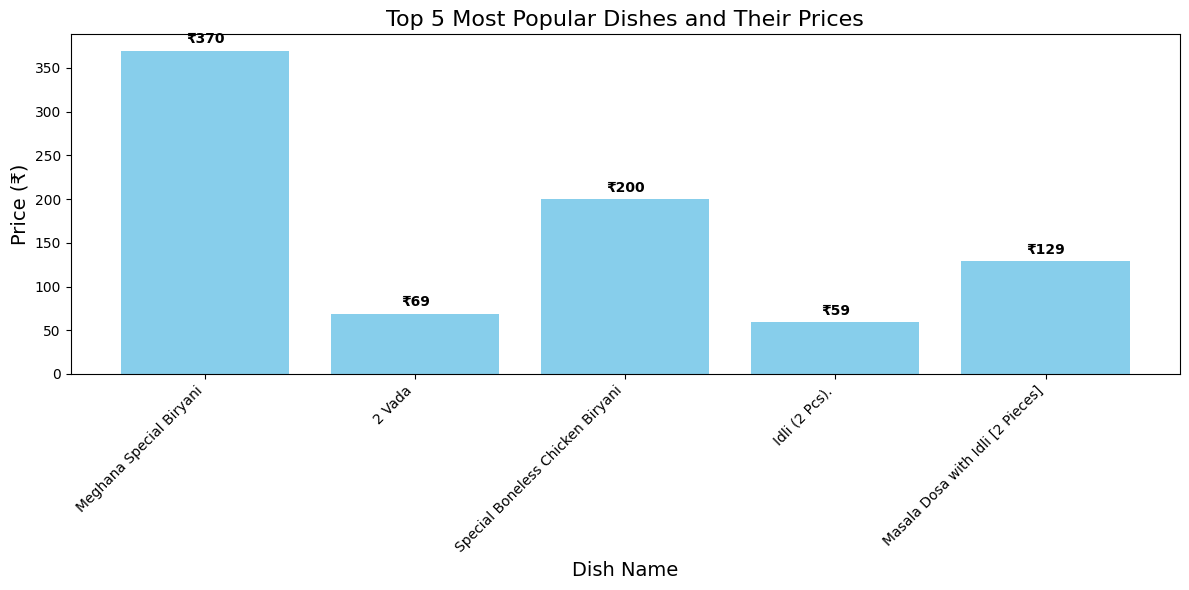

NetworkX code executed successfully!

> Finished chain.
================================= Tool Message =================================
Name: text_to_nx_algorithm_for_public_db

{"top_dishes": ["Meghana Special Biryani", "2 Vada", "Special Boneless Chicken Biryani", "Idli (2 Pcs).", "Masala Dosa with Idli [2 Pieces]"], "prices": [370, 69, 200, 59, 129]}
================================== Ai Message ==================================

Here are the top 5 dishes based on popularity along with their prices:

---

## Top 5 Most Popular Dishes

1. **Meghana Special Biryani** - ₹370
   - Description: The chicken is cooked with an extra coating of an egg along with our in-house andra spice blend. It is moderately spicy and serves two.

2. **2 Vada** - ₹69
   - Description: Served with sambar and chutney. No soda used in the preparation.

3. **Special Boneless Chicken Biryani** - ₹200
   - Description: Marinated boneless chicken and layered with parboiled rice, herbs, saffron milk & then ghee.

Assistant:

Here are the top 5 dishes based on popularity along with their prices:                                             

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

                                             Top 5 Most Popular Dishes                                             

 1 Meghana Special Biryani - ₹370                                                                                  
    • Description: The chicken is cooked with an extra coating of an egg along with our in-house andra spice blend.
      It is moderately spicy and serves two.                                                                       
 2 2 Vada - ₹69                                                                                                    
    • Description: Served with sambar and chutney. No soda used in the preparation.                                
 3 Special Boneless Chicken Biryani - ₹200                                                                         
    • Description: Marinated boneless chicken and layered with parboiled rice, herbs, saffron milk & then ghee.    
 4 Idli (2 Pcs.) - ₹59                                                                                             
    • Description: Served with chutney and sambar.                                                                 
 5 Masala Dosa with Idli [2 Pieces] - ₹129                                                                         
    • Description: Served with sambar and chutney. No soda used in the preparation.                                

I've created a chart showing these dishes and their prices. The visualization shows that Meghana Special Biryani is
the most expensive at ₹370, while Idli (2 Pcs.) is the most affordable at ₹59.                                     

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Would you like me to help you place an order for any of these popular dishes, or would you prefer to see more      
information about any specific restaurant that serves these dishes?

Exiting Assistant. Goodbye!

In [ ]:
agent_claude.run_interactive(thread_id=str(uuid.uuid4()), debug=True)